###### RFE is a wrapper-based feature selection method. It works by recursively removing features and building a model on the remaining features. It then ranks the features by the order of their elimination.
###### RFE uses the model's coefficients or feature importances to identify the least important features and remove them.

#### Useful :
###### It helps you find the most important features for your model.
###### It can help improve model performance by reducing overfitting.
###### It is particularly useful when you have a large number of features and want to reduce the dimensionality of your data.


#### Algorithm
###### Training a model on the full set of features.
###### Ranking features based on their importance (derived from model coefficients or feature importances).
###### Removing the least important feature.
###### Repeating steps 1-3 until the desired number of features is reached.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE, SelectPercentile
from sklearn.model_selection import train_test_split

In [18]:
# We select MinMaxScaled data, because it gives more accuracy and less loss, despite too little latencycompared to StandardScaling
df = pd.read_csv("C:/Users/DilshodbekMX/PycharmProjects/Cyber/Normalization/MinMaxScaling.csv", low_memory=False)
df.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0.000000,0.091080,0.328101,0.239987,0.794107,0.604403,0.006760,0.352941,0.246193,...,0.454545,0.001253,0.002184,0.004293,0.000644,0.083017,0.001615,0.083439,0.081228,1
1,1,0.000006,0.624611,0.245482,0.288850,0.791299,0.223591,0.000809,1.000000,0.214860,...,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
2,2,0.000012,0.032264,0.084343,0.446652,0.521897,0.214884,0.006760,0.352941,0.083647,...,0.000000,0.000618,0.001209,0.003237,0.000379,0.080068,0.021086,0.083531,0.043356,1
3,3,0.000017,0.297427,0.640548,0.300064,0.001221,0.328405,0.576220,0.352941,0.167571,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,4,0.000023,0.445803,0.010234,0.170939,0.794717,0.261212,0.051714,0.352941,0.905422,...,0.454545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1


In [21]:
X = df.drop("Label", axis=1)  # Features
y = df["Label"]

In [22]:
# Calculate 80% of the total number of features
num_features = X.shape[1]
k_features = int(num_features * 0.8)  
k_features

62

In [30]:
# Create a base model (e.g., Linear or Logistic Regression)
model = LogisticRegression(max_iter=1000)

In [31]:
# Create the RFE object and rank each pixel
rfe = RFE(estimator=model, n_features_to_select=k_features)
fit = rfe.fit(X, y)


In [32]:
# Get the selected feature names and ranking
selected_features = X.columns[fit.support_]
ranking = rfe.ranking_

print("Num Features:", fit.n_features_)
print("Selected Features:", fit.support_)
print("Feature Ranking:", fit.ranking_)

Num Features: 62
Selected Features: [False False  True  True  True  True  True  True  True  True False  True
 False  True False  True  True False  True  True False  True  True False
  True False  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True False  True  True False  True  True  True
 False  True  True  True False False  True  True  True  True  True  True
  True  True  True  True  True  True]
Feature Ranking: [16 17  1  1  1  1  1  1  1  1 10  1  8  1  2  1  1  7  1  1  6  1  1 15
  1 12  1  1  1  1  1  1  1 11  1  1  1  1  1  1  1  1  4  1  1  1  1  1
  1  1  1  1  1 13  1  1 14  1  1  1  5  1  1  1  9  3  1  1  1  1  1  1
  1  1  1  1  1  1]


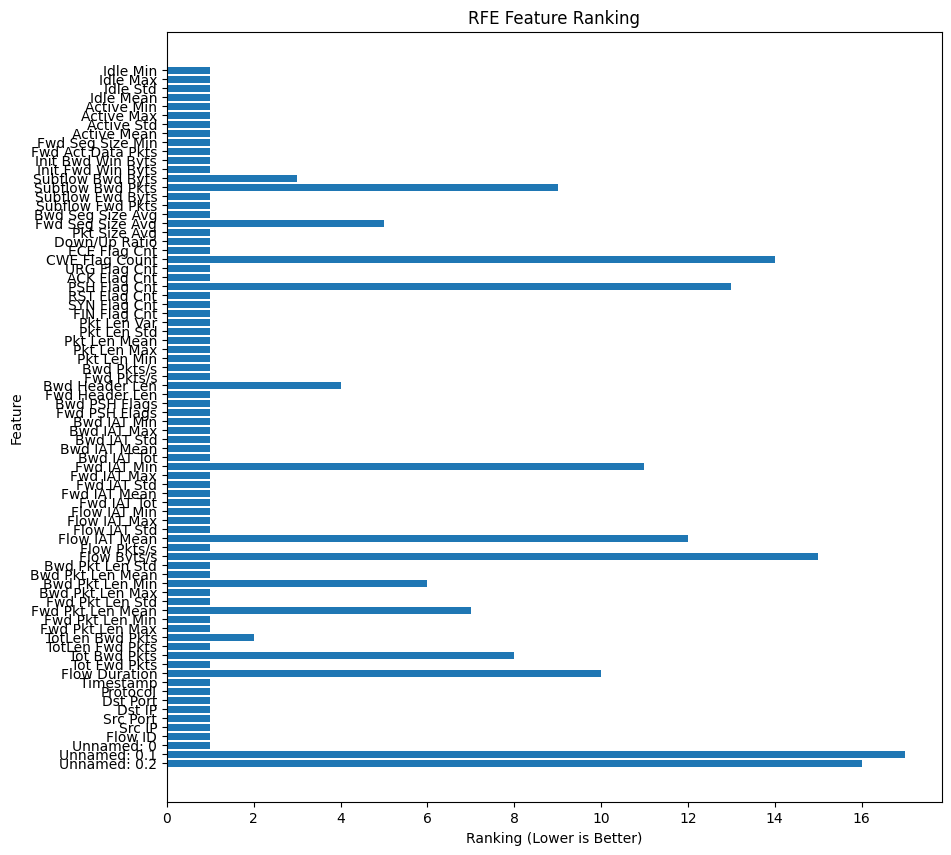

In [33]:
# Plotting Feature Ranking
plt.figure(figsize=(10, 10))
plt.barh(X.columns, ranking)
plt.xlabel('Ranking (Lower is Better)')
plt.ylabel('Feature')
plt.title('RFE Feature Ranking')
plt.show()

In [35]:
for i, feature in enumerate(X.columns):
    print(f"{feature}: {ranking[i]}")

Unnamed: 0.2: 16
Unnamed: 0.1: 17
Unnamed: 0: 1
Flow ID: 1
Src IP: 1
Src Port: 1
Dst IP: 1
Dst Port: 1
Protocol: 1
Timestamp: 1
Flow Duration: 10
Tot Fwd Pkts: 1
Tot Bwd Pkts: 8
TotLen Fwd Pkts: 1
TotLen Bwd Pkts: 2
Fwd Pkt Len Max: 1
Fwd Pkt Len Min: 1
Fwd Pkt Len Mean: 7
Fwd Pkt Len Std: 1
Bwd Pkt Len Max: 1
Bwd Pkt Len Min: 6
Bwd Pkt Len Mean: 1
Bwd Pkt Len Std: 1
Flow Byts/s: 15
Flow Pkts/s: 1
Flow IAT Mean: 12
Flow IAT Std: 1
Flow IAT Max: 1
Flow IAT Min: 1
Fwd IAT Tot: 1
Fwd IAT Mean: 1
Fwd IAT Std: 1
Fwd IAT Max: 1
Fwd IAT Min: 11
Bwd IAT Tot: 1
Bwd IAT Mean: 1
Bwd IAT Std: 1
Bwd IAT Max: 1
Bwd IAT Min: 1
Fwd PSH Flags: 1
Bwd PSH Flags: 1
Fwd Header Len: 1
Bwd Header Len: 4
Fwd Pkts/s: 1
Bwd Pkts/s: 1
Pkt Len Min: 1
Pkt Len Max: 1
Pkt Len Mean: 1
Pkt Len Std: 1
Pkt Len Var: 1
FIN Flag Cnt: 1
SYN Flag Cnt: 1
RST Flag Cnt: 1
PSH Flag Cnt: 13
ACK Flag Cnt: 1
URG Flag Cnt: 1
CWE Flag Count: 14
ECE Flag Cnt: 1
Down/Up Ratio: 1
Pkt Size Avg: 1
Fwd Seg Size Avg: 5
Bwd Seg Size Avg: 1
S

In [37]:
# Get selected features 
selected_features = X.columns[fit.support_]

# Create a new DataFrame with only selected features from the original DataFrame
X_selected_df = X[selected_features]
X_selected_df

,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Tot Fwd Pkts,TotLen Fwd Pkts,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,0.091080,0.328101,0.239987,0.794107,0.604403,0.006760,0.352941,0.246193,0.000091,0.000177,...,0.000052,0.454545,0.001253,0.002184,0.004293,0.000644,0.083017,0.001615,0.083439,0.081228
1,0.624611,0.245482,0.288850,0.791299,0.223591,0.000809,1.000000,0.214860,0.000007,0.000009,...,0.000000,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.032264,0.084343,0.446652,0.521897,0.214884,0.006760,0.352941,0.083647,0.000156,0.001465,...,0.000046,0.000000,0.000618,0.001209,0.003237,0.000379,0.080068,0.021086,0.083531,0.043356
3,0.297427,0.640548,0.300064,0.001221,0.328405,0.576220,0.352941,0.167571,0.000026,0.000190,...,0.000007,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.445803,0.010234,0.170939,0.794717,0.261212,0.051714,0.352941,0.905422,0.000059,0.000233,...,0.000033,0.454545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172004,0.241651,0.880275,0.300384,0.001221,0.328569,0.846522,0.352941,0.973918,0.000026,0.000190,...,0.000007,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
172005,0.155045,0.172553,0.264819,0.806162,0.223591,0.000809,1.000000,0.820418,0.000007,0.000006,...,0.000000,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
172006,0.164479,0.865995,0.300384,0.001221,0.328076,0.909101,0.352941,0.931253,0.000026,0.000190,...,0.000007,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
172007,0.348366,0.360296,0.247997,0.783197,0.482011,0.006760,0.352941,0.861877,0.000085,0.000121,...,0.000039,0.454545,0.003830,0.004991,0.006237,0.001424,0.484363,0.000647,0.484614,0.484112


In [38]:
df

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0.000000,0.091080,0.328101,0.239987,0.794107,0.604403,0.006760,0.352941,0.246193,...,0.454545,0.001253,0.002184,0.004293,0.000644,0.083017,0.001615,0.083439,0.081228,1
1,1,0.000006,0.624611,0.245482,0.288850,0.791299,0.223591,0.000809,1.000000,0.214860,...,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
2,2,0.000012,0.032264,0.084343,0.446652,0.521897,0.214884,0.006760,0.352941,0.083647,...,0.000000,0.000618,0.001209,0.003237,0.000379,0.080068,0.021086,0.083531,0.043356,1
3,3,0.000017,0.297427,0.640548,0.300064,0.001221,0.328405,0.576220,0.352941,0.167571,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,4,0.000023,0.445803,0.010234,0.170939,0.794717,0.261212,0.051714,0.352941,0.905422,...,0.454545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172004,172004,0.999977,0.241651,0.880275,0.300384,0.001221,0.328569,0.846522,0.352941,0.973918,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
172005,172005,0.999983,0.155045,0.172553,0.264819,0.806162,0.223591,0.000809,1.000000,0.820418,...,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
172006,172006,0.999988,0.164479,0.865995,0.300384,0.001221,0.328076,0.909101,0.352941,0.931253,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
172007,172007,0.999994,0.348366,0.360296,0.247997,0.783197,0.482011,0.006760,0.352941,0.861877,...,0.454545,0.003830,0.004991,0.006237,0.001424,0.484363,0.000647,0.484614,0.484112,1


In [39]:
df_selected.to_csv("RecursiveFeatureElimination.csv")

NameError: name 'df_selected' is not defined